# Fun with numpy.random
Exploring numpy.random library as assignment for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 11-10-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/fun-with-numpy-random/>.

___

## Introduction

NumPy (Numerical Python) is a library of external methods to Python, dedicated to numerical computing. One of its capabilities is pseudo-random number generator - a  random sampling package - `numpy.random`. The package can be divided into four sections (as per [NumPy documentation](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html)):
1. Simple random data,
2. Permutations,
3. Distributions,
4. Random generator.

Below we will take a closer look at each of these sections.

Note: In this Notebook terms 'function', 'method', 'routine' and 'subroutine' are used interchangeably.

### Setting up the scene

Importing numpy.random library and version check.

In [2]:
import numpy as np # NumPy package
import matplotlib.pyplot as plt # plotting engine
# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

In [3]:
np.version.version

'1.17.2'

A built-in help is available, accessible through the following commands:  
`dir()` prints out available functionalities of the parsed method  
`help()` shows doc-string of the parsed method

In [4]:
# dir(np.random) # commented out for clarity

In [5]:
# help(np.random.randint) # commented out for clarity

___
## Simple random data

NumPy library comes with a large numbers of built-in functionalities, in the library documentation referred as to routines. Random sampling (`numpy.random`) is an example of such a subroutine. 

**Simple random data** is a collection of methods used for two categories of application:  
1) generating of a pseudo random number from a range,  
2) random selection of an object from a list.

In the first category, there are several methods, producing different outputs. For instance, the `np.random.random()` generates float numbers from half-open range [0,1), whereas `np.random.randint()` generates integer numbers from a range.

The second category, offers the functionality of random picking of objects from an existing list. 

Below we will see example use of a few methods from the Simple random data.

### Function random.random
This method returns random float number(s) from _uniform distribution_ on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)

In [6]:
# get a random float number from *uniform distributtion* on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)
np.random.random()

0.9437110106761238

In [7]:
# get 5 random numbers from [0,1) and print out avarage of them
sum = 0
for i in range(5):
    x = np.random.random()
    sum = sum + x
    print(i+1,":",x, end=", ")
print("\nMean:",sum/5)

1 : 0.4543977743766301, 2 : 0.9801979166705759, 3 : 0.36983382438792634, 4 : 0.5326587347705543, 5 : 0.3912983326560463, 
Mean: 0.5456773165723465


In [8]:
# get a n-dimensional array (ndarray) of random numbers on [0,1); when no value is parsed, it returns a simple float number
np.random.random((2,3)) # double brackets, because this method takes a single value only - in this case a tuple

array([[0.32759407, 0.2918098 , 0.10845156],
       [0.66500809, 0.92784336, 0.27123443]])

### Function random.randn  

This method generates a n-dimensional array of numbers from the _standard normal distribution_.

In [9]:
np.random.randn(2, 4)

array([[-0.75316674, -0.14471319,  0.40948652,  0.60861382],
       [ 0.95989044,  1.58369784,  0.3762722 , -0.55571926]])

The probability of a random number occurring far from the centreline decreases rapidly, but never becomes impossible (p=0).

It may be convenient to compare the `random` and `randn` subroutines to each other with results visualised on a plots.  
Plotting random distribution vs normal distribution.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


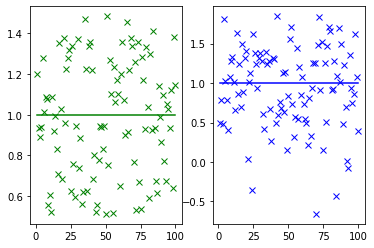

In [10]:
x = np.arange(0.0, 101, 1) # set range of x values for plotting

# horizontal lines
y1 = x/x # constant horizontal line against x - will be used as a baseline for showing random noise
y2 = x/x # - will be used as a baseline for showing normal noise

# random data points
noise_uniform = np.random.random(size=(len(x)))-0.5 # random (uniform) noise in on (0,1] and offset by0.5 in order to centralise about the base line, at y=1
noise_normal = np.random.normal(0.0, 0.5, len(x)) # normal distribution of noise

# Uniform distribution
plt.subplot(1, 2, 1)
plt.plot(x, y1, 'g-') # baseline for uniform distribution noise
plt.plot(x, y1 + noise_uniform, 'gx') # green x-es denote random noise value for each sample

# Normal distribution
plt.subplot(1, 2, 2)
plt.plot(x, y2, 'b-') # baseline for normal distribution noise
plt.plot(x, y2 + noise_normal, 'bx') # blue x-es denote normal noise value for each sample

# Note there are different y-axis ranges for the below plots

### Funtion random.randint  

This method generates integer number(s) in a given range.

In [11]:
np.random.randint(1,11, size=3) # 3 random integers in range (1,10) - inclusive

array([8, 6, 3])

In the second category of subroutines of simple random data, from a pre-defined pool of objects.

### Function random.choice  

This method returns items (not necessarily numbers) from an existing list.

In [12]:
list_1 = [1,2,3,4] # predefinition of list of numbers
list_2 = ["dog", "cat", "snake", "rat"] # predefinition of list of animals

np.random.choice(list_2, size=7)

array(['snake', 'cat', 'rat', 'cat', 'rat', 'cat', 'dog'], dtype='<U5')

It is also possible to assign a probability for each option:

In [13]:
np.random.choice(list_1, p=[0.1, 0.1, 0.1, 0.7], size=10)

array([4, 4, 2, 1, 4, 2, 4, 2, 3, 4])

### Function random.bytes  

Returns random bytes in hexadecimal format. For example:

In [14]:
np.random.bytes(1)

b'+'

___
## Permutations

This group of methods in NumPy and allow to randomly reorder the objects in the set or in sub-set (range). It consists of two subroutines: `shuffle` and `permutation`.

### Function random.shuffle  

`np.random.shuffle` method randomly reorders the items of the entire set _in place_, that is original order is overwritten with the new sequence.

In [15]:
list = [1,2,3,4,5]
print(list) # in original order
np.random.shuffle(list)
list # in new order, overwriting the original

[1, 2, 3, 4, 5]


[5, 4, 3, 1, 2]

### Function random.permutation
`np.random.permutation` method returns a new array (copy of the original) of the objects from a list, randomly ordered.

In [16]:
# we are using lists from previous examples, defined in cells above
np.random.permutation(list_1)

array([3, 1, 2, 4])

It is worth noting that `np.random.permutation` is built up on `np.random.shuffle` subroutine, which is used in the former source code. Extra functionality is provided on condition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary `shuffle` function.

___
## Distributions

NumPy comes with a selection of built-in probability density distributions, which are used to sample random data in a specific pattern from statistical science.
In NumPy v1.17.2, there are thirty-five different distributions available. Below we will discuss five of them, namely: uniform, standard_normal, binomial, exponential, weibull.

### 1. Uniform distribution  

`numpy.random.uniform` function generates random floating point number(s). Each random value returned from this method is equally probable to occur. The generated numbers are from half-open range - ends defined when the function is called. If the range is not defined, by default it is assumed to be [0,1), in which case the subroutine behaves the same as np.random.random one.

In [17]:
np.random.uniform(size=3)

array([0.91087298, 0.34364321, 0.87465526])

In [18]:
np.mean(np.random.uniform(0.9,1, size=10) * 10)

9.449071300756582

This distribution can be graphically interpreted as a 2-dimensional plane divided into equal areas. For instance, for 1000 random numbers generated (x-axis) in range [1-1000) (y-axis). Each sub-range on y-axis, e.g. 1-200, 201-400, etc, would receive the same amount of hits with equal probability. The density of dots in the plot below appears uniformly distributed, especially for a larger number of numbers generated.

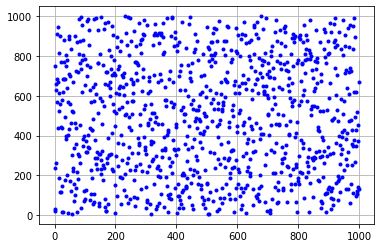

In [19]:
plt.plot(np.random.uniform(1,1000, size=1000), 'b.')
plt.grid()

The uniform distribution shows a property to fill out histograms bins uniformly, which becomes clearer for increasing number of samples. In other words, the more samples, the more equally filled is each bin on the histogram.

<function matplotlib.pyplot.show(*args, **kw)>

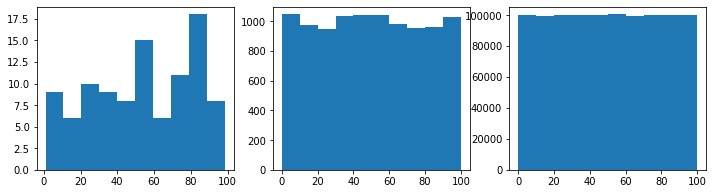

In [20]:
plt.figure(figsize=(12,3)) # size of the plot (width, height)

plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0,100, size=10**2)) # 100 samples

plt.subplot(1, 3, 2)
plt.hist(np.random.uniform(0,100, size=10**4)) # 10000 samples

plt.subplot(1, 3, 3)
plt.hist(np.random.uniform(0,100, size=10**6)) # 1000000 samples

plt.show # this command will hide away numeral values of the output - for clarity

### 2. Standard normal distribution

`numpy.random.standard_normal` draws a standard normal (Gaussian) distribution for mean=0 and deviation=1 (another NumPy distribution, `np.random.normal`, allows to change these parameters). The more samples, the more "ideal" shape of the distribution.

Actual minimum:  -3.1581898335051117
Actual maximum:  3.001730569088281
Actual mean:  0.02550514735476619
Actual standard diviation:  0.9875834268707029


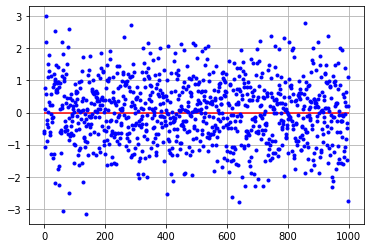

In [21]:
a = np.random.standard_normal(size=1000) # standard normal distribution generation for n=1000 samples

plt.hlines(0,0,1000, colors='r') # baseline 
plt.grid()
plt.plot(a, 'b.')

# for reference, actual distribution parameters from the generated set
print("Actual minimum: ", np.min(a))
print("Actual maximum: ", np.max(a))
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))

(array([  2.,   4.,   6.,  12.,  22.,  45.,  72.,  62., 107., 125., 118.,
        125.,  96.,  82.,  50.,  30.,  21.,  15.,   3.,   3.]),
 array([-3.15818983, -2.85019381, -2.54219779, -2.23420177, -1.92620575,
        -1.61820973, -1.31021371, -1.00221769, -0.69422167, -0.38622565,
        -0.07822963,  0.22976639,  0.53776241,  0.84575843,  1.15375445,
         1.46175047,  1.76974649,  2.07774251,  2.38573853,  2.69373455,
         3.00173057]),
 <a list of 20 Patch objects>)

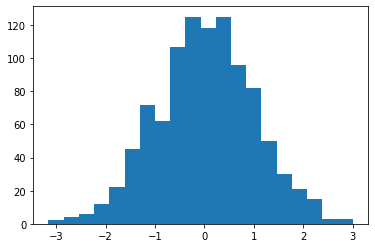

In [22]:
plt.hist(a, bins=20)

### 3. Binomial distribution

`np.random.binomial` samples from binomial distribution, where the results are two-folds, often represented as a _success_ or a _failure_. This distribution gives number of successful trials of `n`-total number of trials. Each result has a predefined `p`-probability of success.
For a large number of repetition (represented in NumPy by parameter _size_), and equal probability of winning (p=0.5), the result resembles a normal distribution.

In [23]:
np.random.binomial(1,0.5, size=10) # for 10 attempts, what is the result of the test, 1 - success, 0 - failure

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

Actual mean:  5.0209
Actual standard diviation:  1.5724068144090446


<function matplotlib.pyplot.show(*args, **kw)>

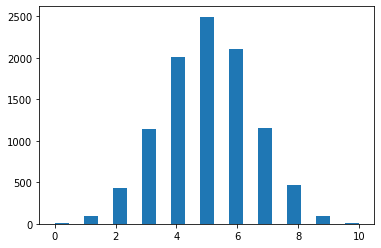

In [24]:
a = np.random.binomial(10,0.5, size=10000) # how many success will be in n=10 trials of tossing a 'fair' coin (p=0.5), test repetead 10000 times
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))
plt.hist(a, bins=21) # density of successes in 10-trials binomial tests repeated 10000 times
plt.show # this command will hide away numeral values of the output - for clarity

### 4. Exponential distribution

`numpy.random.exponential` function draws results from exponential distribution. This type of distribution is typically used to calculate the probability of an event occurring in a time interval. It takes two parameters, the first one being the _scale_, which relates to the time period, and the other one - _size_, which is a number of experiments (by default size=10). For example, if independent events are to occur per unit of time (which is a function of parameter _scale_), the exponential distribution describes the time intervals between successive events.  
Exponential distribution is a special case of gamma distribution, and is related to Poisson distribution.  
Below is an example of the distribution and the graphical interpretation.

<function matplotlib.pyplot.show(*args, **kw)>

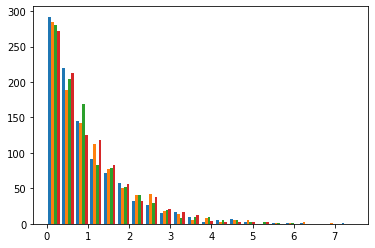

In [25]:
a = np.random.exponential(1, [1000,4]) # the first parameter (scale) relates to time period, the second one (size) - to number of experiments (4 sets of 1000 experiments)
plt.hist(a, bins=22) # the values in bins are grouped by sets of experiment, each in represented by different colour
plt.show # this command will hide away numeral values of the output - for clarity

### 5. Weibull distribution

`numpy.random.weibull` subroutine produces results from weilbull distribution. This probability distribution found a numerous applications in technical science. For instance, it is often used in equipment reliability study, e.g. to evaluate mean time between failures (MTBF) - maintenance and reliability related concepts were discussed in the [paper](http://system.logistics-and-transport.eu/index.php/main/article/view/509) I published. 


The function takes two parameters: shape and size.

The _shape_ parameter is a positive float number must be greater than one. 
Its value will dictate the  the slope of the regressed line in probability plot' (Realiawiki), corresponding to certain conditions being simulated. For shape > 1 the probability density distribution resembles normal 
distribution, but skewed; for shape < 1 it resembles exponential distribution.

For example, below is a plot showing the _shape_ value .5, 1.0, 1.5, 2.0 and 4.0.

The _size_ parameter represents the how large is the experiment. Below plot illustrate the Weibull density distribution for two sets of experiments, of 500 observations each, discriminated in the plots by colour.

<function matplotlib.pyplot.show(*args, **kw)>

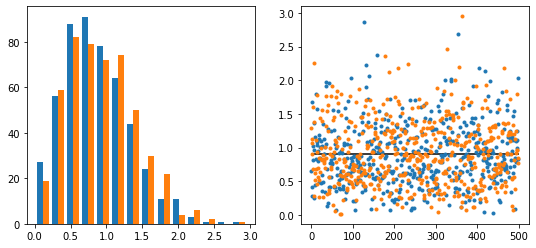

In [49]:
a = np.random.weibull(2, [500,2]) # the first parameter (shape), the second one (size) - to number of experiments (2 sets of 500 experiments)

plt.figure(figsize=(9,4)) # size of the plot (width, height)

plt.subplot(1, 2, 1)
plt.hist(a, bins=14) # results of the two sets of experiments are represented by differnt colours

plt.subplot(1, 2, 2)
plt.plot(a, '.')
plt.hlines((np.mean(a)),0,500, colors='k') # draws a horizontal line at mean-value for comparison purpose

plt.show # this command will hide away numeral values of the output - for clarity

___
## Seed

#### The concept of Pseudo Randomness 

Randomness is an interesting question in computer science in general, and posses some technical challenges (source: [Quora](https://www.quora.com/Why-is-it-so-hard-to-generate-actually-random-numbers)). 

In practice, the uncertainty is simulated by application of algorithms. The resulting numbers are obtained in deterministic way. For k various inputs there may be only k possible outputs. There is also a finite amount of computer memory, limiting the calculations. The generated results are not truly random, and so are called pseudo-random. The technique of acquiring a number via such algorithms is referred as to _Pseudo Random Number Generator_ (PRNG). Of course, much effort is put into ensuring the generated results appear satisfactorily random. The algorithms are complex and for most of typical applications, excluding security and cryptography (not discussed here), the simulated randomness is sufficient. 

Python (and NumPy) uses PRNG the Mersenne Twister algorithm. Below is a short exert from OverStack on the algorithm (source: [StackOverflow](https://stackoverflow.com/a/7030595)). 

>  [Python and NumPy] both use the Mersenne twister sequence to generate their random numbers, and they're both completely deterministic - that is, if you know a few key bits of information, it's possible to predict with absolute certainty what number will come next. For this reason, neither numpy.random nor random.random is suitable for any serious cryptographic uses. But because the sequence is so very very long, both are fine for generating random numbers in cases where you aren't worried about people trying to reverse-engineer your data. This is also the reason for the necessity to seed the random value - if you start in the same place each time, you'll always get the same sequence of random numbers!


#### Seed

The above quote gives and insight into the concept of _seed_. It is, essentially, a numeric input, on which the algorithm produces the pseudo-random output. The seed  defines the initial conditions for the generator. If the initial conditions are the same, the result will also be the same. The PRNG, naturally, modifies the value of the seed used on continuous basis. The randomness, often referred as to entropy, is simulated by inputs from the outside, an element of chaos in the natural world. There are various sources of the inputs form the hardware, like mouse movements or the noise generated by a fan [Wikipedia](https://en.wikipedia.org/wiki/Entropy_(computing)).
Often, the seed is taken from the system clock. The system clock in Unix-based systems is stored in the form of seconds passed from 1st January 1970. As the passing time is monitored with a high precision (CPU dependent), every time the pseudo-random number that is generated may appear different and random.  

#### System clock

The current time in seconds passed from 1st January 1970 can be obtained with `time()` method from Python `time` library.

In [27]:
import time;
time.time()

1573167294.0402887

In [28]:
np.random.random()

0.01930609167527919

#### Seed reuse

Furthermore, as per another [StackOverflow response](https://stackoverflow.com/a/32172816), it is possible to retrieve the _seed_ used with the help of `numpy.random.get_state` method, and hence reproduces the same result. 

User can pass a value of _seed_ to the random function to control the generated data, for example in order to produce the same output. 

In [29]:
# set seed number
np.random.seed(1) # seed = 1
# generate pseudo-random numbers
for i in range(4):
    print(np.random.random(), end=" ")
print("\n") # new line

# use the same seed value again to get the same output
np.random.seed(1)
# generate pseudo-random numbers
for i in range(4):
    print(np.random.random(), end=" ")

0.417022004702574 0.7203244934421581 0.00011437481734488664 0.30233257263183977 

0.417022004702574 0.7203244934421581 0.00011437481734488664 0.30233257263183977 

___
## References

... 


## End